<h1> <b> Machine Learning Lab Assignment - 4 </b> </h2>


```
Kaushik Prajapati - 202201472
```



<h4> Library Installation

In [325]:
# !pip install keras
# !pip install tensorflow

import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input
from keras.optimizers import Adam

<h4> Evaluation Metrics

In [326]:
def NMSE(y_true, y_pred):

    n = len(y_true)
    y_mean = sum(y_true) / n
    se, se_mean = 0.0, 0.0
    for i in range(n):
        se += ((y_true[i]-y_pred[i]) ** 2)
        se_mean += ((y_true[i]-y_mean) ** 2)
    if se_mean == 0:
        return "Divide by zero!"
    nmse = se/se_mean
    return nmse

def RMSE(y_true, y_pred):
    n = len(y_true)
    rmse = 0.0
    for i in range(n):
        rmse += ((y_true[i]-y_pred[i]) ** 2)
    rmse /= n
    rmse = np.sqrt(rmse)
    return rmse

def MAE(y_true, y_pred):
    n = len(y_true)
    mae = 0.0
    for i in range(n):
        mae += abs(y_true[i]-y_pred[i])
    mae /= n
    return mae

def R2(y_true, y_pred):
    n = len(y_true)
    SSres = 0.0
    SStot = 0.0
    for i in range(n):
        SSres += ((y_true[i]-y_pred[i]) ** 2)
        SStot += ((y_true[i]-np.mean(y_true)) ** 2)
    if SStot == 0:
        return 1
    return 1 - (SSres/SStot)

def MAPE(y_true, y_pred):
    n = len(y_true)
    mape = 0.0
    for i in range(n):
      mape += abs((y_true[i]-y_pred[i])/y_true[i])
    mape /= n
    return mape

<p align="justify"> <b>Q1.</b> Generate $100$ real number for the variable $X$ from the uniform distribution $U [0,1]$. Construct the training set $T = \{ (x_1,y_1),(x_2,y_2),......,(x_{100},y_{100})\}$ using the relation $Y_i = sin(2 π xi) + εi$ where $εi$ ~ $N(0,0.25)$. In the similar way construct a testing set of size $50$ i,e. $Test = \{ (x^{'}_{1},y^{'}_{1}),(x^{'}_{2},y^{'}_{2}),......,(x^{'}_{50},y^{'}_{50}) \}$. Fit Artificial Neural Network of single hidden layer with 10 number of neurons and plot estimates on testing set. Also compute the RMSE, MAE, MAPE, NMSE and R2
.

<h3> Generating training dataset and testing dataset.

In [330]:
x_train = np.random.uniform(0, 1, 100)
y_train = np.array([np.sin(2 * np.pi * x_train[i]) + np.random.normal(0, 0.5) for i in range(100)])
x_train, y_train = zip(*sorted(zip(x_train, y_train)))
# print(x_train, y_train)

x_test = np.random.uniform(0, 1, 50)
y_test = np.array([np.sin(2 * np.pi * x_test[i]) + np.random.normal(0, 0.5) for i in range(50)])
x_test, y_test = zip(*sorted(zip(x_test, y_test)))
# print(x_test, y_test)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

<h3> Plot for training dataset and testing dataset.

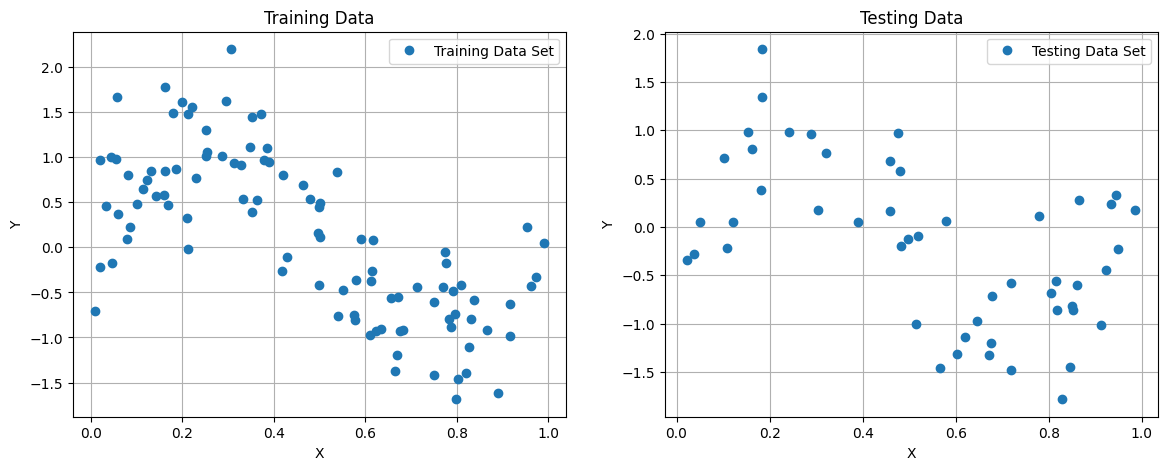

In [331]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'o', label='Training Data Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'o', label='Testing Data Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Testing Data')
plt.grid()
plt.legend()

plt.show()

<h4> Build ANN Model

In [332]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

<h4> Train ANN Model

In [333]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.3901  


<h4> Prediction on Train Data and Test Data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


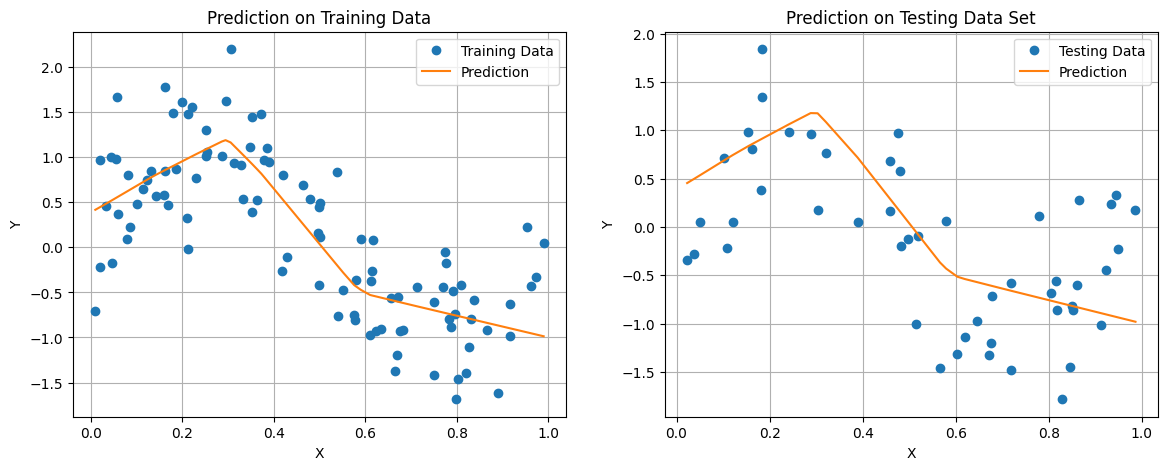

In [334]:
y_pred_train = model.predict(x_train)[:, 0]
y_pred_test = model.predict(x_test)[:, 0]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_train, y_pred_train, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction on Training Data')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'o', label='Testing Data')
plt.plot(x_test, y_pred_test, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction on Testing Data Set')
plt.grid()
plt.legend()

plt.show()

<h4> RMSE, NMSE, MAE, MAPE and R2 metric calculation.

In [335]:
train_rmse = RMSE(y_train, y_pred_train)
train_nmse = NMSE(y_train, y_pred_train)
train_mae = MAE(y_train, y_pred_train)
train_mape = MAPE(y_train, y_pred_train)
train_r2 = R2(y_train, y_pred_train)

print("Train RMSE: ", train_rmse)
print("Train NMSE: ", train_nmse)
print("Train MAE: ", train_mae)
print("Train MAPE: ", train_mape)
print("Train R2: ", train_r2)

test_rmse = RMSE(y_test, y_pred_test)
test_nmse = NMSE(y_test, y_pred_test)
test_mae = MAE(y_test, y_pred_test)
test_mape = MAPE(y_test, y_pred_test)
test_r2 = R2(y_test, y_pred_test)

print("\nTest RMSE: ", test_rmse)
print("Test NMSE: ", test_nmse)
print("Test MAE: ", test_mae)
print("Test MAPE: ", test_mape)
print("Test R2: ", test_r2)

Train RMSE:  0.4994768380271846
Train NMSE:  0.31402365978908553
Train MAE:  0.4069455060933395
Train MAPE:  1.8377854467894459
Train R2:  0.6859763402109145

Test RMSE:  0.6393367767283437
Test NMSE:  0.6011620706781565
Test MAE:  0.5230516170530329
Test MAPE:  2.0969894749263314
Test R2:  0.3988379293218435


<p> <b>Q2.</b> Add outliers to training set $T$: Modify the training set $T$ by picking up randomly $15$ data points from the training set $T$ and scale their yi values by $20$. Fit Artificial Neural Network of single hidden layer with $10$ number of neurons and plot estimates on testing set. Also compute the RMSE, MAE, MAPE,NMSE and R2. Comment upon the efficiency of least square loss in presence of outliers.

<h4> Adding Outliers to training set

In [336]:
random_indices = np.random.randint(0, 101, 15)
y_train[random_indices] = y_train[random_indices] * 20

<h4> Build ANN Model

In [337]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

<h4> Train ANN Model

In [338]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 5.8491  


<h4> Prediction on Train Data and Test Data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


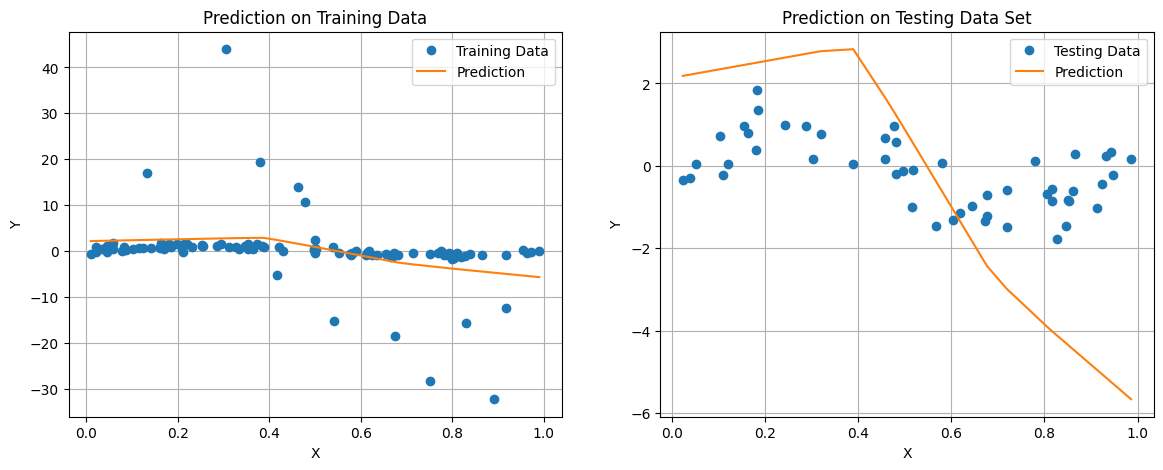

In [339]:
y_pred_train = model.predict(x_train)[:, 0]
y_pred_test = model.predict(x_test)[:, 0]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_train, y_pred_train, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction on Training Data')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'o', label='Testing Data')
plt.plot(x_test, y_pred_test, label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction on Testing Data Set')
plt.grid()
plt.legend()

plt.show()

<h4> RMSE, NMSE, MAE, MAPE and R2 metric calculation.

In [340]:
train_rmse = RMSE(y_train, y_pred_train)
train_nmse = NMSE(y_train, y_pred_train)
train_mae = MAE(y_train, y_pred_train)
train_mape = MAPE(y_train, y_pred_train)
train_r2 = R2(y_train, y_pred_train)

print("Train RMSE: ", train_rmse)
print("Train NMSE: ", train_nmse)
print("Train MAE: ", train_mae)
print("Train MAPE: ", train_mape)
print("Train R2: ", train_r2)

test_rmse = RMSE(y_test, y_pred_test)
test_nmse = NMSE(y_test, y_pred_test)
test_mae = MAE(y_test, y_pred_test)
test_mape = MAPE(y_test, y_pred_test)
test_r2 = R2(y_test, y_pred_test)

print("\nTest RMSE: ", test_rmse)
print("Test NMSE: ", test_nmse)
print("Test MAE: ", test_mae)
print("Test MAPE: ", test_mape)
print("Test R2: ", test_r2)

Train RMSE:  7.077087190464031
Train NMSE:  0.8580623118211981
Train MAE:  3.749356044036966
Train MAPE:  5.7333731383214515
Train R2:  0.14193768817880192

Test RMSE:  2.7273920224217285
Test NMSE:  10.940252083381761
Test MAE:  2.3111281108372097
Test MAPE:  8.941303386917149
Test R2:  -9.940252083381761


<p align="justify"> <b>Q3.</b> Consider the Boston Housing Dataset. Divide the dataset in training, validation and testing sets. Train ANN using training set, tune parameters of ANN using validation set and evaluate the model on testing set. After tuning the best parameter on validation set, report the RMSE, MAE, MAPE, NMSE and on R2 testing set.

<h4> Importing data from boston_housing_data.csv .

In [341]:
df = pd.read_csv('BostonHousing.csv')
print(df.shape)
data = list(df.values)
print(len(data))

(506, 14)
506


<h4> Dividing given data into three sets, Training Set, Validation Set and Testing Set

In [342]:
N = len(data)
train_size = int(0.6 * N)
valid_size = int(0.2 * N)
test_size = N - train_size - valid_size

train_data = data[ : train_size]
x_train = [x[:-1] for x in train_data]
y_train = [x[-1] for x in train_data]
x_train = np.array([np.array(x) for x in x_train])
y_train = np.array([np.array(y) for y in y_train])

valid_data = data[train_size : train_size + valid_size]
x_valid = [x[:-1] for x in valid_data]
y_valid = [x[-1] for x in valid_data]
x_valid = np.array([np.array(x) for x in x_valid])
y_valid = np.array([np.array(y) for y in y_valid])

test_data = data[train_size + valid_size : ]
x_test = [x[:-1] for x in test_data]
y_test = [x[-1] for x in test_data]
x_test = np.array([np.array(x) for x in x_test])
y_test = np.array([np.array(y) for y in y_test])

<h4> Build ANN Model

In [350]:
number_of_input_features = len(x_train[0])
model = Sequential()
model.add(Input(shape=(number_of_input_features, )))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

<h4> Train ANN Model

In [351]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 231.5644  


<h4> Prediction on Train Data and Test Data

In [352]:
y_pred_train = model.predict(x_train)[:, 0]
y_pred_test = model.predict(x_test)[:, 0]
y_pred_valid = model.predict(x_valid)[:, 0]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<h4> RMSE, NMSE, MAE, MAPE and R2 metric calculation.

In [353]:
train_rmse = RMSE(y_train, y_pred_train)
train_nmse = NMSE(y_train, y_pred_train)
train_mae = MAE(y_train, y_pred_train)
train_mape = MAPE(y_train, y_pred_train)
train_r2 = R2(y_train, y_pred_train)

print("Train RMSE: ", train_rmse)
print("Train NMSE: ", train_nmse)
print("Train MAE: ", train_mae)
print("Train MAPE: ", train_mape)
print("Train R2: ", train_r2)

valid_rmse = RMSE(y_valid, y_pred_valid)
valid_nmse = NMSE(y_valid, y_pred_valid)
valid_mae = MAE(y_valid, y_pred_valid)
valid_mape = MAPE(y_valid, y_pred_valid)
valid_r2 = R2(y_valid, y_pred_valid)

print("\nValidation RMSE: ", valid_rmse)
print("Validation NMSE: ", valid_nmse)
print("Validation MAE: ", valid_mae)
print("Validation MAPE: ", valid_mape)
print("Validation R2: ", valid_r2)

test_rmse = RMSE(y_test, y_pred_test)
test_nmse = NMSE(y_test, y_pred_test)
test_mae = MAE(y_test, y_pred_test)
test_mape = MAPE(y_test, y_pred_test)
test_r2 = R2(y_test, y_pred_test)

print("\nTest RMSE: ", test_rmse)
print("Test NMSE: ", test_nmse)
print("Test MAE: ", test_mae)
print("Test MAPE: ", test_mape)
print("Test R2: ", test_r2)

Train RMSE:  6.469813092157062
Train NMSE:  0.5367152349686765
Train MAE:  4.763149364159836
Train MAPE:  0.1909913229998058
Train R2:  0.46328476503132365

Validation RMSE:  8.133287511637795
Validation NMSE:  0.7515045696394647
Validation MAE:  6.367332868292781
Validation MAPE:  0.41569189738117
Validation R2:  0.24849543036053534

Test RMSE:  13.398244529359102
Test NMSE:  6.676230556862123
Test MAE:  9.985413370120758
Test MAPE:  0.816895396282053
Test R2:  -5.676230556862123
